# 농수산물 192개 품목 중 상위 15개 품목 시각화

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

API_KEY = "d66bd13c-eace-4cab-b140-3e67cbd3c1f4"
API_ID = "chldnwls37@naver.com"

item_codes_by_category = {
    '100': ['111', '112', '113', '114', '141', '142', '143', '144', '151', '152', '161', '162', '163', '164'],
    '200': ['211', '212', '213', '214', '215', '216', '217', '218', '221', '222', '223', '224', '225', '226',
            '231', '232', '233', '241', '242', '243', '244', '245', '246', '247', '248', '251', '252', '253',
            '254', '255', '256', '257', '258', '259', '261', '262', '263', '264', '265', '266', '267', '268',
            '269', '270', '271', '272', '273', '274', '275', '276', '277', '278', '279', '280', '422'],
    '300': ['312', '313', '314', '315', '316', '317', '318', '319', '321', '322', '323'],
    '400': ['411', '412', '413', '414', '415', '416', '418', '419', '420', '421', '423', '424', '425', '426',
            '427', '428', '429', '430', '431', '432', '433', '434', '435', '436', '437'],
    '500': ['611', '612', '613', '614', '615', '616', '619', '638', '639', '640', '641', '642', '644', '649',
            '650', '651', '652', '653', '654', '655', '656', '657', '658', '659', '660']
}

all_extracted_retail_goods_data = []

for category_code, item_codes in item_codes_by_category.items():
    for item_code in item_codes: 
        params = {
            'action': 'monthlySalesList',
            'p_yyyy': '2025',            
            'p_period': '5',
            'p_itemcategorycode': category_code,
            'p_itemcode': item_code, 
            'p_kindcode': '00',
            'p_convert_kg_yn': 'Y',  
            'p_cert_key': API_KEY,      
            'p_cert_id': API_ID,          
            'p_returntype': 'json'      
        }

        url = "http://www.kamis.or.kr/service/price/xml.do"

        try:
            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            if data and "price" in data:
                for price_info in data["price"]:
                    product_class_code = price_info.get("productclscode")
                    caption = price_info.get("caption")
                    items = price_info.get("item", [])

                    if product_class_code == "01" and "상품" in caption:
                        if items:
                            for item in items:
                                parsed_item_name_raw = caption.split('>')[2].strip() if len(caption.split('>')) > 2 else caption
                                parsed_item_name = "null" if parsed_item_name_raw.lower() == "null" else parsed_item_name_raw

                                monthly_prices = {
                                    "부류코드": category_code,
                                    "품목코드": item_code,    
                                    "연도": item.get("yyyy"),
                                    "품목정보_원문": caption,
                                    "품목명": parsed_item_name,
                                    "데이터종류": "소매가격", 
                                    "등급": "상품",         
                                    "1월": item.get("m1", "-"),
                                    "2월": item.get("m2", "-"),
                                    "3월": item.get("m3", "-"),
                                    "4월": item.get("m4", "-"),
                                    "5월": item.get("m5", "-"),
                                    "6월": item.get("m6", "-"),
                                    "7월": item.get("m7", "-"),
                                    "8월": item.get("m8", "-"),
                                    "9월": item.get("m9", "-"),
                                    "10월": item.get("m10", "-"),
                                    "11월": item.get("m11", "-"),
                                    "12월": item.get("m12", "-"),
                                    "연평균": item.get("yearavg", "-")
                                }
                                all_extracted_retail_goods_data.append(monthly_prices)
                        # else:
                            # print(f"[{category_code}-{item_code}] 소매가격 '상품' 등급의 '{caption}'에 해당하는 월별 데이터가 없습니다.")
            # else:
                # print(f"[{category_code}-{item_code}] 'price' 데이터가 없습니다.")
    
        except requests.exceptions.HTTPError as http_err:
            print(f"HTTP 오류 발생: {http_err} (부류코드={category_code}, 품목코드={item_code})")
        except Exception as err:
            print(f"기타 오류 발생: {err} (부류코드={category_code}, 품목코드={item_code})")

if all_extracted_retail_goods_data:
    df = pd.DataFrame(all_extracted_retail_goods_data)
    print("\n--- 추출된 소매가격 (상품) DataFrame ---")
    print(df.head())
    print(f"\n총 {len(df)}개의 소매가격 (상품) 데이터가 DataFrame에 저장되었습니다.")

else:
    print("\n수집된 소매가격 (상품) 데이터가 없어 DataFrame을 생성할 수 없습니다.")

기타 오류 발생: 'str' object has no attribute 'get' (부류코드=200, 품목코드=216)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=200, 품목코드=248)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=300, 품목코드=318)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=300, 품목코드=319)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=400, 품목코드=426)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=400, 품목코드=427)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=400, 품목코드=430)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=500, 품목코드=650)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=500, 품목코드=651)
기타 오류 발생: 'str' object has no attribute 'get' (부류코드=500, 품목코드=652)

--- 추출된 소매가격 (상품) DataFrame ---
  부류코드 품목코드    연도                                품목정보_원문 품목명 데이터종류  등급  \
0  100  142  2025  소매가격 > 식량작물 > 팥 > 붉은 팥(국산) > 상품 > 1kg   팥  소매가격  상품   
1  100  142  2024  소매가격 > 식량작물 > 팥 > 붉은 팥(국산) > 상품 > 1kg   팥  소매가격  상품   
2  100  142  2023  소매가격 > 식량작물 > 팥 > 붉은 팥(국산) > 상품 > 1kg   팥  소매가격  상품   
3

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   부류코드     192 non-null    object
 1   품목코드     192 non-null    object
 2   연도       192 non-null    object
 3   품목정보_원문  192 non-null    object
 4   품목명      192 non-null    object
 5   데이터종류    192 non-null    object
 6   등급       192 non-null    object
 7   1월       192 non-null    object
 8   2월       192 non-null    object
 9   3월       192 non-null    object
 10  4월       192 non-null    object
 11  5월       192 non-null    object
 12  6월       192 non-null    object
 13  7월       192 non-null    object
 14  8월       192 non-null    object
 15  9월       192 non-null    object
 16  10월      192 non-null    object
 17  11월      192 non-null    object
 18  12월      192 non-null    object
 19  연평균      192 non-null    object
dtypes: object(20)
memory usage: 30.1+ KB


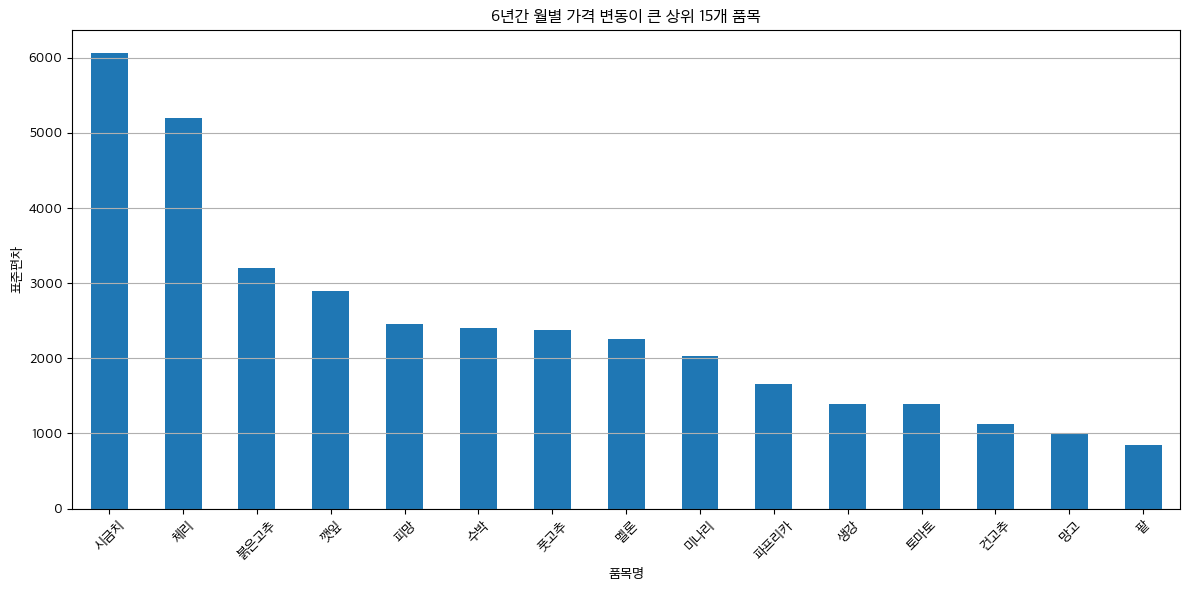

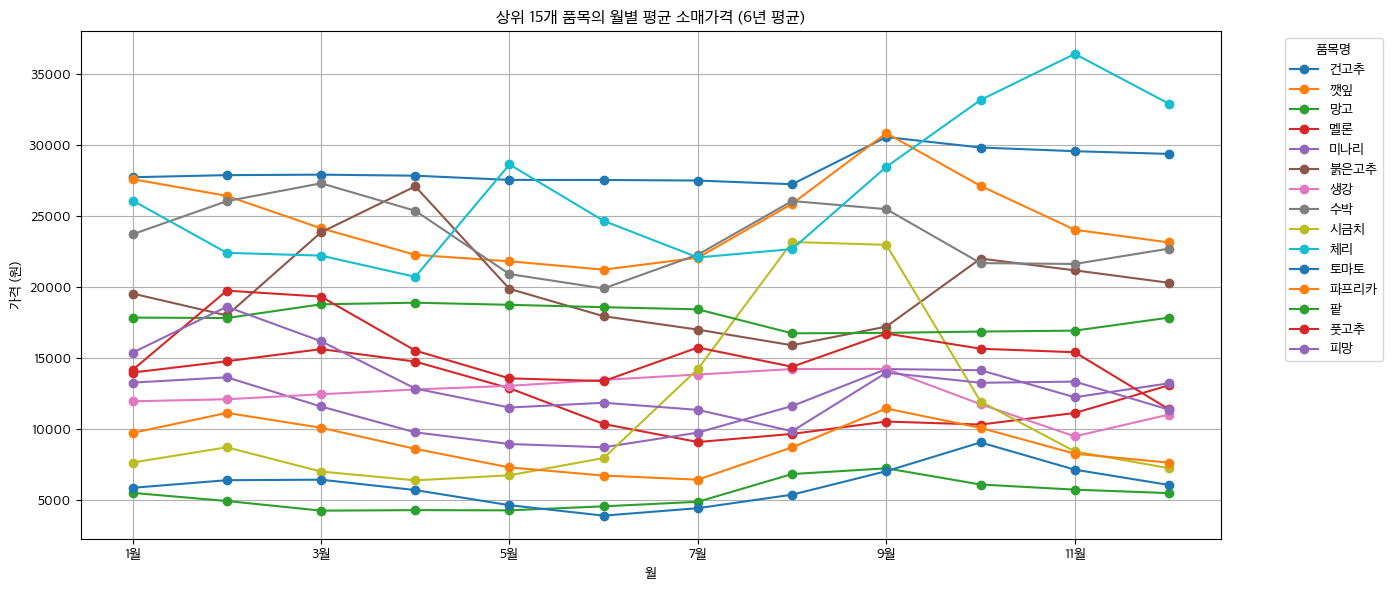

In [3]:
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font = fm.FontProperties(fname=font_path).get_name()
matplotlib.rc('font', family=font)

month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']

for col in month_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

df_std = df.groupby(['품목명', '연도'])[month_cols].mean().reset_index()
df_std_grouped = df_std.groupby('품목명')[month_cols].mean()

df_std_grouped = df_std_grouped.dropna()

df_std_grouped['표준편차'] = df_std_grouped.std(axis=1)
top_items_std = df_std_grouped['표준편차'].sort_values(ascending=False)

top15 = top_items_std.head(15)
top15_items = top15.index.tolist()

plt.figure(figsize=(12, 6))
top15.plot(kind='bar')
plt.title('6년간 월별 가격 변동이 큰 상위 15개 품목')
plt.ylabel('표준편차')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

df_line = df[df['품목명'].isin(top15_items)].groupby('품목명')[month_cols].mean()

df_line.T.plot(figsize=(14, 6), marker='o')
plt.title('상위 15개 품목의 월별 평균 소매가격 (6년 평균)')
plt.ylabel('가격 (원)')
plt.xlabel('월')
plt.grid(True)
plt.legend(title='품목명', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 시금치 소매 가격과 시금치 수출 중량 상관분석

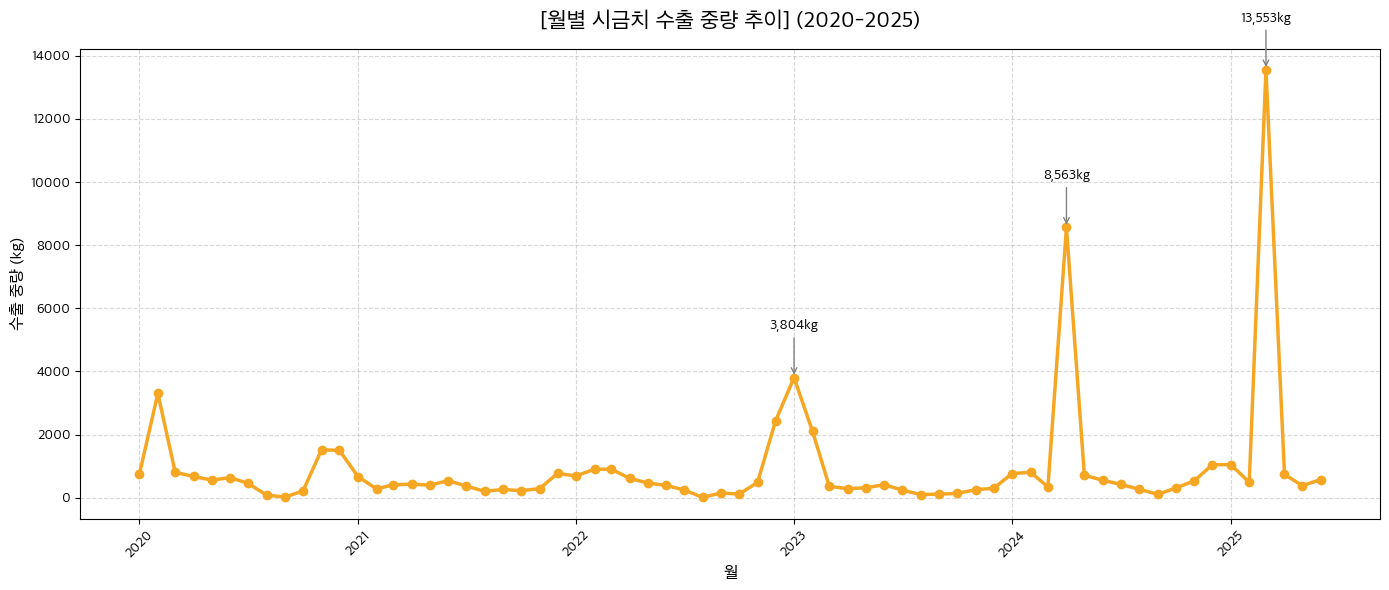

In [4]:
spinach_df = pd.read_excel('/Users/woojin/Desktop/SK Networks Family AI Camp_17/2DA_Team/data/시금치_수출량.xlsx')

spinach_df = spinach_df.drop(['AGCODE', 'HSCODE'], axis=1).reset_index(drop=True)


spinach_df = pd.read_excel("/Users/woojin/Desktop/SK Networks Family AI Camp_17/2DA_Team/data/시금치_수출량.xlsx")
spinach_df['DATE'] = pd.to_datetime(spinach_df['DATE'].astype(str), format='%Y%m')
monthly_total = spinach_df.groupby(spinach_df['DATE'].dt.to_period('M'))['중량'].sum()
monthly_total.index = monthly_total.index.to_timestamp()

plt.figure(figsize=(14, 6))
plt.plot(monthly_total.index, monthly_total.values, color='#f5a623', marker='o', linewidth=2.5)
plt.title('[월별 시금치 수출 중량 추이] (2020-2025)', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('수출 중량 (kg)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

peak = monthly_total.sort_values(ascending=False).head(3)
for date, value in peak.items():
    plt.annotate(f"{int(value):,}kg", 
                 xy=(date, value), 
                 xytext=(date, value + 1500),
                 textcoords='data',
                 ha='center', fontsize=10,
                 arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

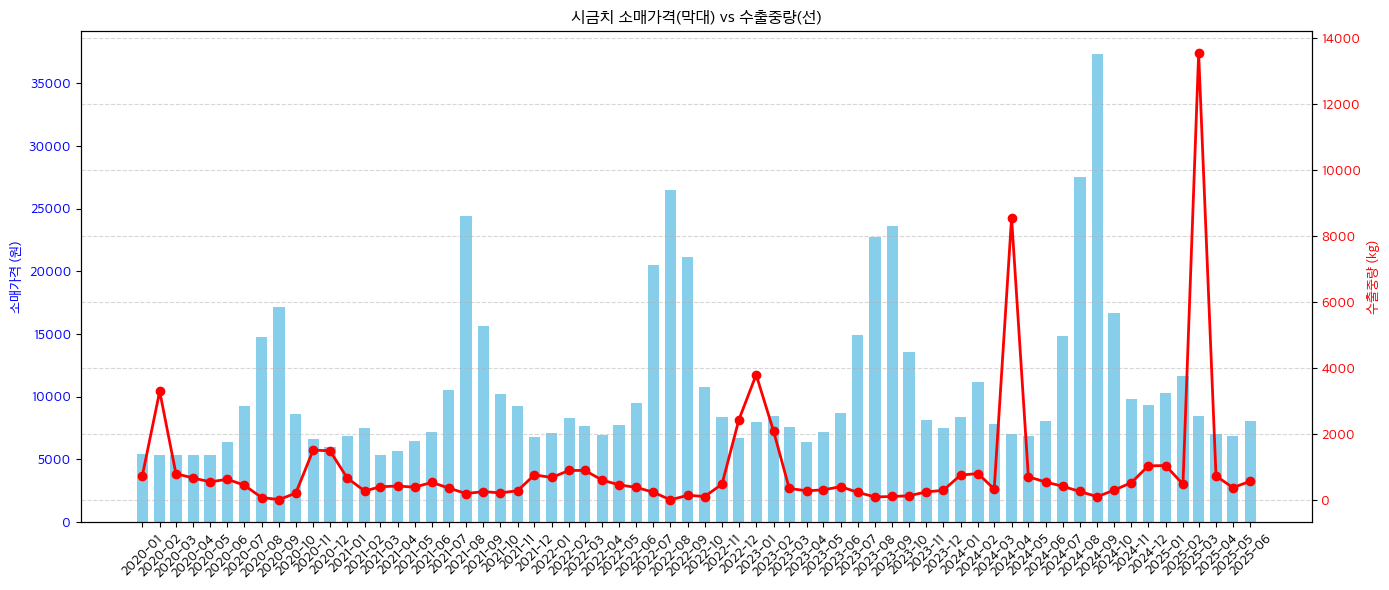

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

export_df = pd.read_excel("/Users/woojin/Desktop/SK Networks Family AI Camp_17/2DA_Team/data/시금치_수출량.xlsx")
export_df['DATE'] = pd.to_datetime(export_df['DATE'].astype(str), format='%Y%m')

monthly_export = (
    export_df.groupby(export_df['DATE'].dt.to_period('M'))['중량']
    .sum()
    .reset_index()
)
monthly_export['DATE'] = monthly_export['DATE'].dt.to_timestamp()
monthly_export = monthly_export.rename(columns={'DATE': '날짜', '중량': '수출중량'})


df_spinach = df[df['품목명'] == '시금치'].copy()

month_cols = ['1월', '2월', '3월', '4월', '5월', '6월',
              '7월', '8월', '9월', '10월', '11월', '12월']

for col in month_cols:
    df_spinach[col] = pd.to_numeric(df_spinach[col].astype(str).str.replace(',', ''), errors='coerce')


df_price = df_spinach.melt(id_vars='연도', value_vars=month_cols,
                           var_name='월', value_name='소매가격')
df_price['월'] = df_price['월'].str.replace('월', '').astype(int)
df_price['날짜'] = pd.to_datetime(df_price['연도'].astype(str) + '-' + df_price['월'].astype(str))


merged_df = pd.merge(df_price[['날짜', '소매가격']], monthly_export, on='날짜')


merged_df = merged_df.sort_values('날짜')

fig, ax1 = plt.subplots(figsize=(14, 6))

# 소매가격: 막대
ax1.bar(merged_df['날짜'], merged_df['소매가격'], width=20, color='skyblue', label='소매가격')
ax1.set_ylabel('소매가격 (원)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 수출중량: 선
ax2 = ax1.twinx()
ax2.plot(merged_df['날짜'], merged_df['수출중량'], color='red', marker='o', linewidth=2, label='수출중량')
ax2.set_ylabel('수출중량 (kg)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.set_xticks(merged_df['날짜'])
ax1.set_xticklabels(merged_df['날짜'].dt.strftime('%Y-%m'), rotation=45)

plt.title('시금치 소매가격(막대) vs 수출중량(선)')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
fig.tight_layout()
plt.show()